## **Step 1: Installing Required Libraries**

In [4]:
!pip install pandas matplotlib seaborn nltk wordcloud
import nltk
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## **Step 2: Load the JSON into a DataFrame**

In [5]:
import pandas as pd

# Load JSON file
file_path = '/content/sarcasm_data.json'
with open(file_path, 'r') as f:
    data = pd.read_json(f, orient='index')

# Reset index to make IDs a column
data = data.reset_index().rename(columns={'index': 'id'})
print(data.head())  # Check first 5 rows

     id                                          utterance  speaker  \
0   160  It's just a privilege to watch your mind at work.  SHELDON   
1   170  I don't think I'll be able to stop thinking ab...    PENNY   
2   180  Since it's not bee season, you can have my epi...  SHELDON   
3   190  Lois Lane is falling, accelerating at an initi...  SHELDON   
4  1105  I'm just inferring this is a couch because the...  SHELDON   

                                             context  \
0  [I never would have identified the fingerprint...   
1  [This is one of my favorite places to kick bac...   
2  [Here we go. Pad thai, no peanuts., But does i...   
3  [A marathon? How many Superman movies are ther...   
4  [Great Caesar's ghost, look at this place., So...   

                                    context_speakers show  sarcasm  
0                                 [LEONARD, SHELDON]  BBT     True  
1  [HOWARD, PENNY, HOWARD, HOWARD, HOWARD, PENNY,...  BBT     True  
2                         [LE

## **Step 3: Class Distribution Analysis**

Class Distribution:
 sarcasm
True     345
False    345
Name: count, dtype: int64


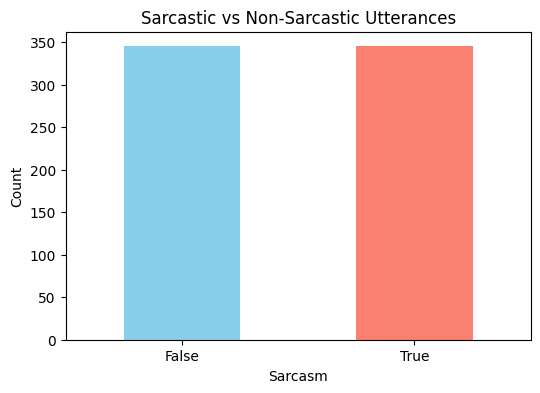

Percentage Sarcastic: 50.00%


In [6]:
import matplotlib.pyplot as plt

# Count sarcastic vs non-sarcastic
class_counts = data['sarcasm'].value_counts()
print("Class Distribution:\n", class_counts)

# Plot
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Sarcastic vs Non-Sarcastic Utterances')
plt.xlabel('Sarcasm')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['False', 'True'], rotation=0)
plt.show()

# Percentage
percent_sarcasm = (class_counts[True] / len(data)) * 100
print(f"Percentage Sarcastic: {percent_sarcasm:.2f}%")

## **Step 4: Text Length Analysis**

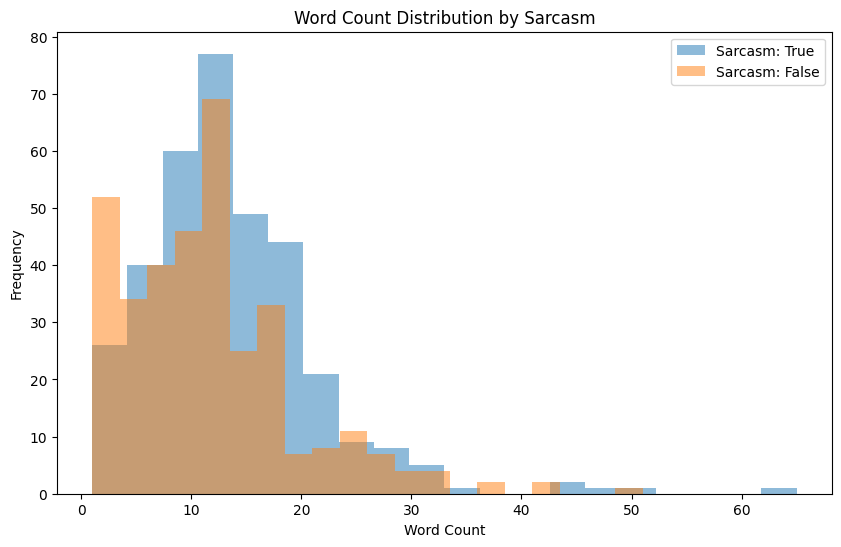

Word Count Stats:
          count       mean       std  min  25%   50%   75%   max
sarcasm                                                        
False    345.0  11.388406  7.863286  1.0  6.0  11.0  15.0  51.0
True     345.0  13.498551  7.896542  1.0  9.0  12.0  17.0  65.0


In [7]:
# Add word count and character count columns
data['word_count'] = data['utterance'].apply(lambda x: len(str(x).split()))
data['char_count'] = data['utterance'].apply(len)

# Plot word count distribution
plt.figure(figsize=(10, 6))
for label in [True, False]:
    subset = data[data['sarcasm'] == label]
    plt.hist(subset['word_count'], bins=20, alpha=0.5, label=f'Sarcasm: {label}')
plt.title('Word Count Distribution by Sarcasm')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Summary stats
print("Word Count Stats:\n", data.groupby('sarcasm')['word_count'].describe())

## **Step 5: Word and Phrase Patterns**

Top Sarcastic Words: [('oh', 43), ('like', 28), ('know', 25), ('yeah', 20), ('right', 20), ('really', 20), ('good', 18), ('see', 18), ('sure', 17), ('well', 17)]
Top Non-Sarcastic Words: [('oh', 29), ('yeah', 23), ('well', 22), ('go', 20), ('know', 19), ('like', 18), ('okay', 17), ('na', 17), ('think', 16), ('right', 14)]


<ipython-input-8-2f756b9ff098>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[0] for w in sarc_top], y=[w[1] for w in sarc_top], palette='Blues_d')


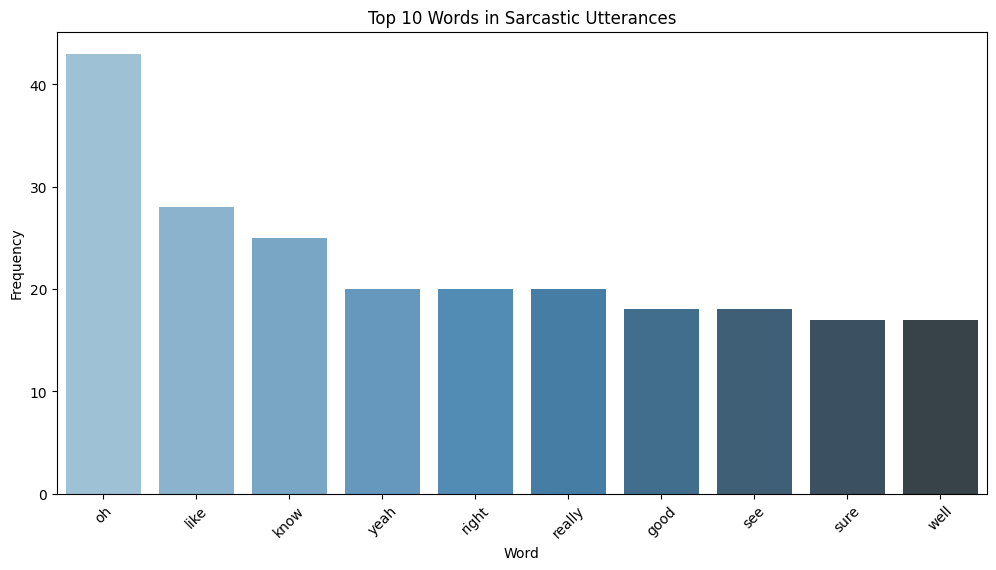

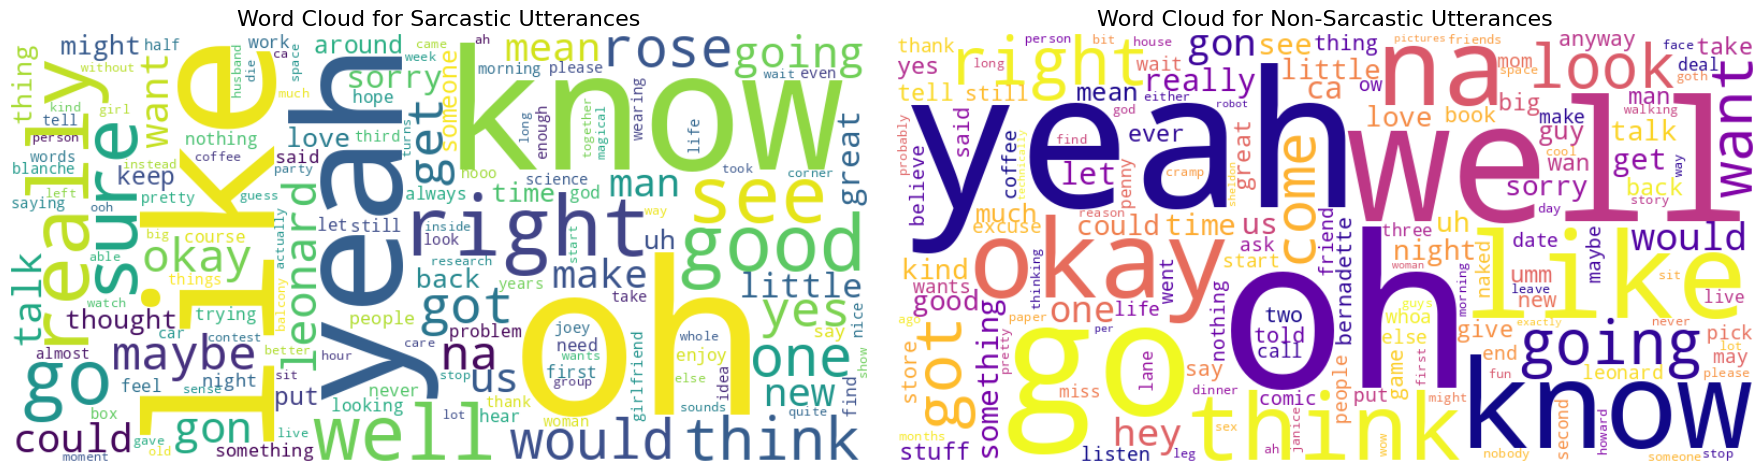

In [8]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns

# Tokenize and clean text
stop_words = set(stopwords.words('english'))
def clean_text(text):
    tokens = word_tokenize(str(text).lower())
    return [word for word in tokens if word.isalnum() and word not in stop_words]

# Get word frequencies
sarcastic_words = Counter()
non_sarcastic_words = Counter()
for idx, row in data.iterrows():
    words = clean_text(row['utterance'])
    if row['sarcasm']:
        sarcastic_words.update(words)
    else:
        non_sarcastic_words.update(words)

# Top 10 words
sarc_top = sarcastic_words.most_common(10)
non_sarc_top = non_sarcastic_words.most_common(10)
print("Top Sarcastic Words:", sarc_top)
print("Top Non-Sarcastic Words:", non_sarc_top)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=[w[0] for w in sarc_top], y=[w[1] for w in sarc_top], palette='Blues_d')
plt.title('Top 10 Words in Sarcastic Utterances')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Sarcastic Word Cloud
sarcastic_wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=150)
sarcastic_wc.generate_from_frequencies(sarcastic_words) # Use the counter

# Non-Sarcastic Word Cloud
non_sarcastic_wc = WordCloud(width=800, height=400, background_color='white', colormap='plasma', max_words=150)
non_sarcastic_wc.generate_from_frequencies(non_sarcastic_words) # Use the counter

# --- Plot the Word Clouds ---
plt.figure(figsize=(18, 8))

# Display Sarcastic Word Cloud
plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
plt.imshow(sarcastic_wc, interpolation='bilinear')
plt.axis('off') # Turn off axis lines and labels
plt.title('Word Cloud for Sarcastic Utterances', fontsize=16)

# Display Non-Sarcastic Word Cloud
plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
plt.imshow(non_sarcastic_wc, interpolation='bilinear')
plt.axis('off') # Turn off axis lines and labels
plt.title('Word Cloud for Non-Sarcastic Utterances', fontsize=16)

plt.tight_layout(pad=2.0) # Adjust layout to prevent overlap
plt.show()

## **Step 6: Punctuation and Capitalization**

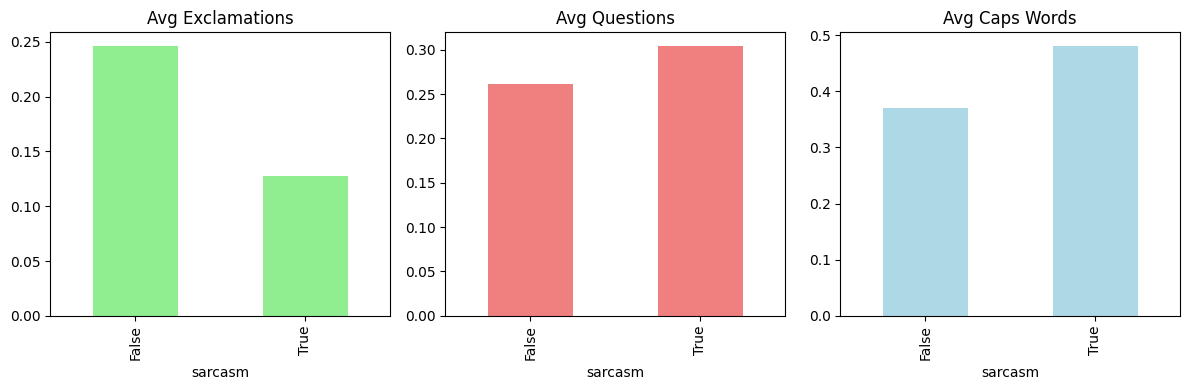

In [9]:
import re

# Count punctuation and caps
data['exclamation'] = data['utterance'].apply(lambda x: len(re.findall(r'!', str(x))))
data['question'] = data['utterance'].apply(lambda x: len(re.findall(r'\?', str(x))))
data['caps_words'] = data['utterance'].apply(lambda x: sum(1 for w in str(x).split() if w.isupper()))

# Plot
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
data.groupby('sarcasm')['exclamation'].mean().plot(kind='bar', color='lightgreen')
plt.title('Avg Exclamations')
plt.subplot(1, 3, 2)
data.groupby('sarcasm')['question'].mean().plot(kind='bar', color='lightcoral')
plt.title('Avg Questions')
plt.subplot(1, 3, 3)
data.groupby('sarcasm')['caps_words'].mean().plot(kind='bar', color='lightblue')
plt.title('Avg Caps Words')
plt.tight_layout()
plt.show()

## **Step 7: Context Analysis**

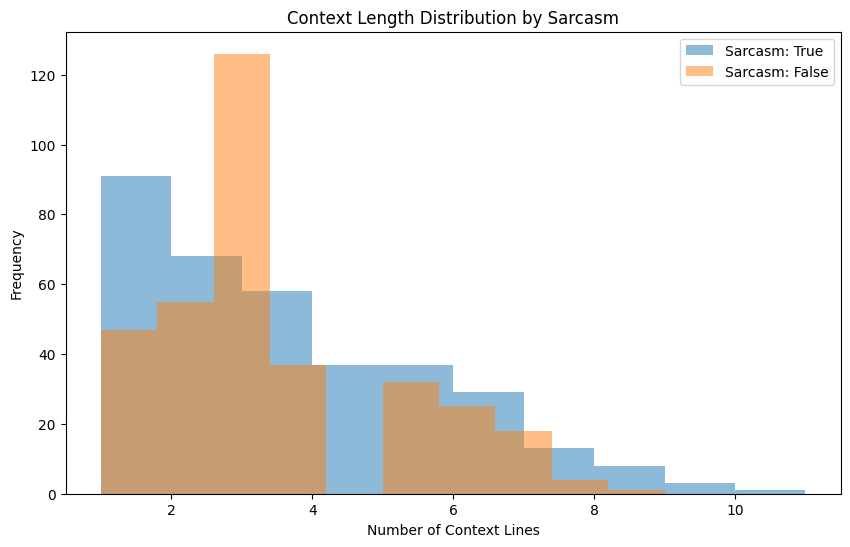

Top Context Words (Sarcastic): [('oh', 73), ('know', 65), ('hey', 43), ('well', 41), ('like', 40), ('would', 34), ('go', 33), ('okay', 33), ('one', 31), ('get', 31)]


In [10]:
# Context length
data['context_len'] = data['context'].apply(len)  # Number of previous lines

# Plot
plt.figure(figsize=(10, 6))
for label in [True, False]:
    subset = data[data['sarcasm'] == label]
    plt.hist(subset['context_len'], bins=10, alpha=0.5, label=f'Sarcasm: {label}')
plt.title('Context Length Distribution by Sarcasm')
plt.xlabel('Number of Context Lines')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Context word frequency (simplified)
context_sarc = Counter()
context_non_sarc = Counter()
for idx, row in data.iterrows():
    words = clean_text(' '.join(row['context']))
    if row['sarcasm']:
        context_sarc.update(words)
    else:
        context_non_sarc.update(words)
print("Top Context Words (Sarcastic):", context_sarc.most_common(10))

## **Step 8: Speaker Analysis**

Sarcasm Rate by Speaker:
 speaker
MEMBER-GIRL    1.000000
ROSE           1.000000
MODERATOR      1.000000
MEMBER-BOY     1.000000
DOROTHY        0.974359
CHANDLER       0.759494
PENNY          0.676471
LEONARD        0.558824
AMY            0.529412
SHELDON        0.505618
Name: sarcasm, dtype: float64


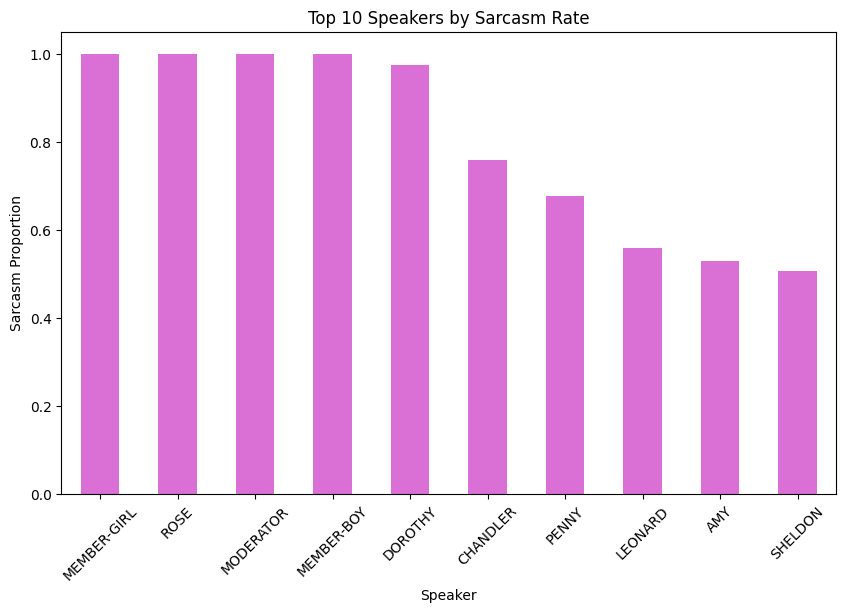

In [11]:
# Sarcasm rate by speaker
speaker_sarcasm = data.groupby('speaker')['sarcasm'].mean().sort_values(ascending=False)
print("Sarcasm Rate by Speaker:\n", speaker_sarcasm.head(10))

# Plot top 10
plt.figure(figsize=(10, 6))
speaker_sarcasm.head(10).plot(kind='bar', color='orchid')
plt.title('Top 10 Speakers by Sarcasm Rate')
plt.xlabel('Speaker')
plt.ylabel('Sarcasm Proportion')
plt.xticks(rotation=45)
plt.show()

## **Step 9: Show Analysis**

Sarcasm Rate by Show:
 show
BBT               0.500000
FRIENDS           0.426966
GOLDENGIRLS       0.975000
SARCASMOHOLICS    1.000000
Name: sarcasm, dtype: float64


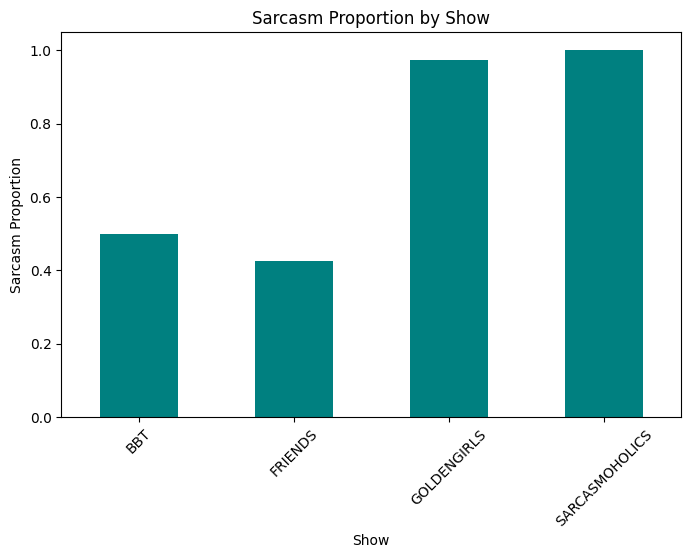

In [12]:
# Sarcasm by show
show_sarcasm = data.groupby('show')['sarcasm'].mean()
print("Sarcasm Rate by Show:\n", show_sarcasm)

# Plot
plt.figure(figsize=(8, 5))
show_sarcasm.plot(kind='bar', color='teal')
plt.title('Sarcasm Proportion by Show')
plt.xlabel('Show')
plt.ylabel('Sarcasm Proportion')
plt.xticks(rotation=45)
plt.show()

## **Step 10: Data Quality Check**

In [13]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Check duplicates
duplicates = data.duplicated(subset=['utterance']).sum()
print(f"Duplicate Utterances: {duplicates}")

# Outliers in word count
print("Word Count Outliers:\n", data['word_count'].describe())

Missing Values:
 id                  0
utterance           0
speaker             0
context             0
context_speakers    0
show                0
sarcasm             0
word_count          0
char_count          0
exclamation         0
question            0
caps_words          0
context_len         0
dtype: int64
Duplicate Utterances: 9
Word Count Outliers:
 count    690.000000
mean      12.443478
std        7.944683
min        1.000000
25%        7.000000
50%       11.000000
75%       16.000000
max       65.000000
Name: word_count, dtype: float64


## **Step 11: Summarize Findings**

### **EDA Summary**  
- **Class Balance**: 50% sarcastic—balanced dataset.  
- **Text Length**: Sarcastic avg ~13.5 words vs. ~11.4 non-sarcastic.  
- **Word Patterns**: “oh,” “like,” “yeah” common in sarcasm.  
- **Punctuation**: More “!” and capitalization in sarcasm.  
- **Context**: Sarcastic utterances have longer conversational contexts.  
- **Speaker/Show**: Chandler, Penny, and Dorothy use sarcasm more often.  
- **Insights**: Dataset quality is solid for NLP modeling.